In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os


In [2]:
# Script definitions
# ------------------

# KMeans sequential - data.1.csv
# KMeans parallel - data.2.csv
# KMeans CUDA - data.3.csv

data_file = '../../lab4/data/data.2.csv'

images_dir = '../images/kmeans_parallel'


In [3]:
if not os.path.exists(images_dir):

	os.system("mkdir -p " + images_dir)

else :

	os.system("rm -r " + images_dir)
	os.system("mkdir -p " + images_dir)


In [4]:
data = pd.read_csv(data_file, sep=',', header=None)

columns = ['image_path', 'scheduling_type', 'chunk_size', 'clusters', 'image_size', 'iterations', 'num_threads', 'overhead', 'read', 'standardize', 'kmeans_malloc', 'kmeans_init', 'kmeans_yi2_init', 'kmeans_yi2', 'kmeans_distance', 'kmeans_update_1', 'kmeans_update_2', 'kmeans_free', 'kmeans_total', 'kmeans_error', 'kmeans_error_time', 'save', 'free', 'total']
headers = ['Image path', 'Scheduling type', 'Chunk size', 'Clusters', 'Image size', 'Iterations', 'Num. threads', 'Overhead', 'Read', 'Standardize', 'KMeans malloc', 'KMeans init', 'KMeans yi2 init', 'KMeans yi2', 'KMeans distance', 'KMeans update 1', 'KMeans update 2', 'KMeans free', 'KMeans total', 'KMeans error', 'KMeans error time', 'Save', 'Free', 'Total']

assert len(data.columns) == len(columns), "Data columns do not match the expected number of columns"

data.columns = columns

print("Total rows: {0}".format(len(data)))


Total rows: 6400


In [5]:
data = data[data['overhead'] < 0.1]

print("Total rows: {0}".format(len(data)))


Total rows: 6400


In [6]:
# Scheduling types
scheduling_types = {
	0: 'Static',
	1: 'Dynamic',
	2: 'Guided',
	3: 'Auto'
}

data['scheduling_type_name'] = data['scheduling_type'].map(scheduling_types)

data['image'] = data['image_path'].apply(lambda x: os.path.basename(x).split('.')[0].capitalize())

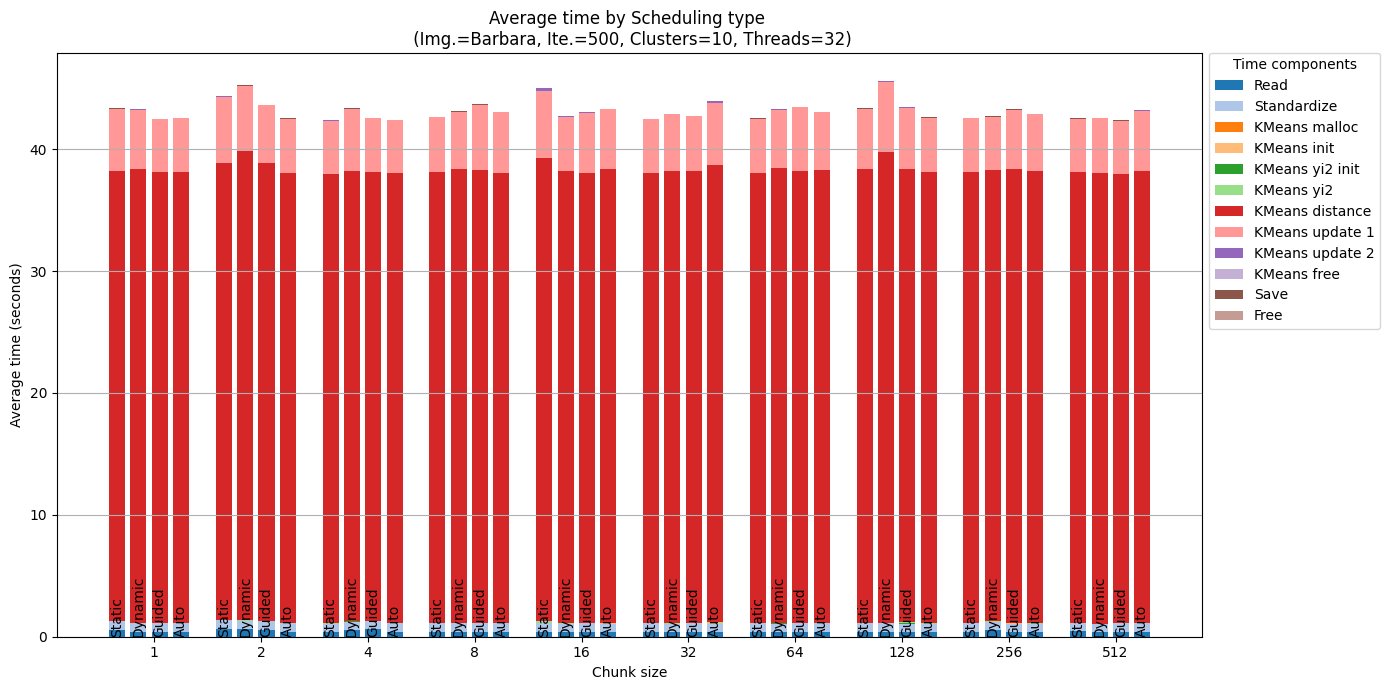

In [7]:
fixed_threads = 32
fixed_image = 'Barbara'

filtered_data = data[(data['num_threads'] == fixed_threads) & (data['image'] == fixed_image)]

grouped = filtered_data.groupby(['chunk_size', 'scheduling_type']).mean(numeric_only=True).reset_index()

chunk_sizes = sorted(grouped['chunk_size'].unique())
scheduling_values = sorted(grouped['scheduling_type'].unique())
time_components = ['read', 'standardize', 'kmeans_malloc', 'kmeans_init', 'kmeans_yi2_init', 'kmeans_yi2', 'kmeans_distance', 'kmeans_update_1', 'kmeans_update_2', 'kmeans_free', 'save', 'free']
labels = [headers[columns.index(comp)] for comp in time_components]

bar_width = 0.15
bar_spacing = 0.05
group_width = (bar_width + bar_spacing) * len(scheduling_values)
x = np.arange(len(chunk_sizes)) * (group_width + 0.2)

colors = plt.cm.tab20.colors

fig, ax = plt.subplots(figsize=(14, 7))

for i, sched in enumerate(scheduling_values):

	bottoms = np.zeros(len(chunk_sizes))

	for j, comp in enumerate(time_components):

		comp_values = []

		for chunk in chunk_sizes:

			row = grouped[(grouped['chunk_size'] == chunk) & (grouped['scheduling_type'] == sched)]
			val = row[comp].values[0] if not row.empty else 0
			comp_values.append(val)

		bar_positions = x + i * (bar_width + bar_spacing)

		ax.bar(bar_positions, comp_values, bottom=bottoms, width=bar_width, label=comp if i == 0 else "", color=colors[j])
		bottoms += np.array(comp_values)

	total_heights = bottoms
	bar_positions = x + i * (bar_width + bar_spacing)

	for xpos, height in zip(bar_positions, total_heights):

		ax.text(xpos, 0.015, scheduling_types[sched], ha='center', va='bottom', rotation=90)

ax.set_xticks(x + group_width / 2 - bar_spacing)
ax.set_xticklabels(chunk_sizes)
ax.set_xlabel('Chunk size')
ax.set_ylabel('Average time (seconds)')
ax.set_title(f'Average time by Scheduling type \n (Img.={fixed_image}, Ite.=500, Clusters=10, Threads={fixed_threads})')
ax.legend(title='Time components', labels=labels, loc='upper left', bbox_to_anchor=(1, 1.0129))
ax.grid(axis='y')

plt.tight_layout()
plt.savefig(os.path.join(images_dir, f'stacked_bar_chunk_scheduling_avg.{fixed_image.lower()}.png'))
plt.show()


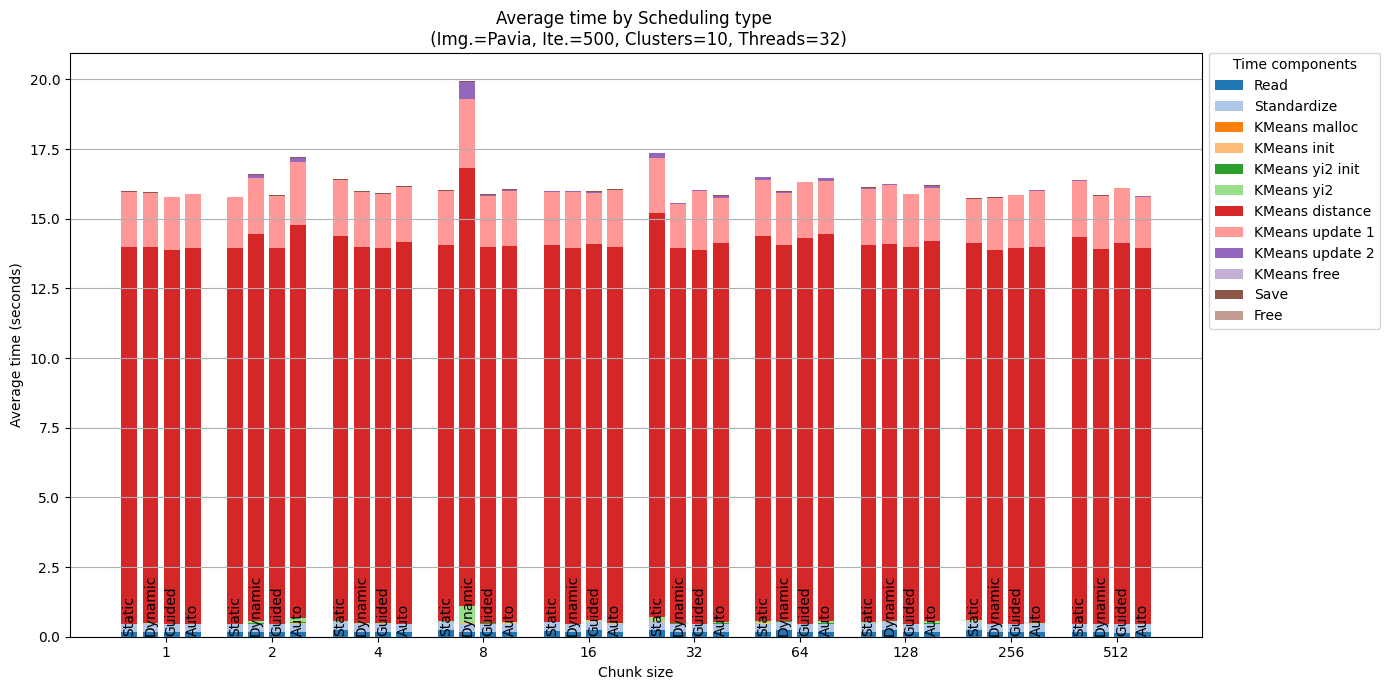

In [8]:
fixed_threads = 32
fixed_image = 'Pavia'

filtered_data = data[(data['num_threads'] == fixed_threads) & (data['image'] == fixed_image)]

grouped = filtered_data.groupby(['chunk_size', 'scheduling_type']).mean(numeric_only=True).reset_index()

chunk_sizes = sorted(grouped['chunk_size'].unique())
scheduling_values = sorted(grouped['scheduling_type'].unique())
time_components = ['read', 'standardize', 'kmeans_malloc', 'kmeans_init', 'kmeans_yi2_init', 'kmeans_yi2', 'kmeans_distance', 'kmeans_update_1', 'kmeans_update_2', 'kmeans_free', 'save', 'free']
labels = [headers[columns.index(comp)] for comp in time_components]

bar_width = 0.15
bar_spacing = 0.05
group_width = (bar_width + bar_spacing) * len(scheduling_values)
x = np.arange(len(chunk_sizes)) * (group_width + 0.2)

colors = plt.cm.tab20.colors

fig, ax = plt.subplots(figsize=(14, 7))

for i, sched in enumerate(scheduling_values):

	bottoms = np.zeros(len(chunk_sizes))

	for j, comp in enumerate(time_components):

		comp_values = []

		for chunk in chunk_sizes:

			row = grouped[(grouped['chunk_size'] == chunk) & (grouped['scheduling_type'] == sched)]
			val = row[comp].values[0] if not row.empty else 0
			comp_values.append(val)

		bar_positions = x + i * (bar_width + bar_spacing)

		ax.bar(bar_positions, comp_values, bottom=bottoms, width=bar_width, label=comp if i == 0 else "", color=colors[j])
		bottoms += np.array(comp_values)

	total_heights = bottoms
	bar_positions = x + i * (bar_width + bar_spacing)

	for xpos, height in zip(bar_positions, total_heights):

		ax.text(xpos, 0.015, scheduling_types[sched], ha='center', va='bottom', rotation=90)

ax.set_xticks(x + group_width / 2 - bar_spacing)
ax.set_xticklabels(chunk_sizes)
ax.set_xlabel('Chunk size')
ax.set_ylabel('Average time (seconds)')
ax.set_title(f'Average time by Scheduling type \n (Img.={fixed_image}, Ite.=500, Clusters=10, Threads={fixed_threads})')
ax.legend(title='Time components', labels=labels, loc='upper left', bbox_to_anchor=(1, 1.0129))
ax.grid(axis='y')

plt.tight_layout()
plt.savefig(os.path.join(images_dir, f'stacked_bar_chunk_scheduling_avg.{fixed_image.lower()}.png'))
plt.show()


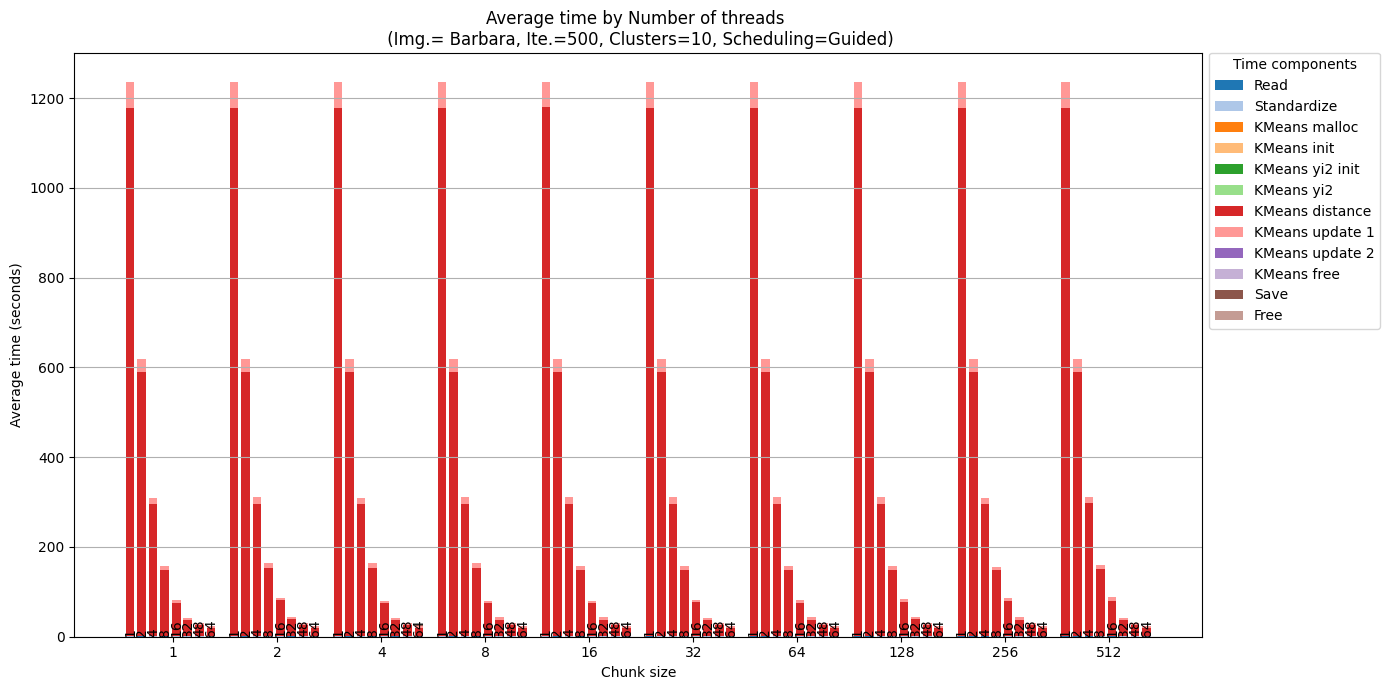

In [9]:
fixed_scheduling_type = 2
fixed_image = 'Barbara'

filtered_data = data[(data['scheduling_type'] == fixed_scheduling_type) & (data['image'] == fixed_image)]

grouped = filtered_data.groupby(['chunk_size', 'num_threads']).mean(numeric_only=True).reset_index()

chunk_sizes = sorted(grouped['chunk_size'].unique())
thread_values = sorted(grouped['num_threads'].unique())
time_components = ['read', 'standardize', 'kmeans_malloc', 'kmeans_init', 'kmeans_yi2_init', 'kmeans_yi2', 'kmeans_distance', 'kmeans_update_1', 'kmeans_update_2', 'kmeans_free', 'save', 'free']
labels = [headers[columns.index(comp)] for comp in time_components]

bar_width = 0.15
bar_spacing = 0.05
group_width = (bar_width + bar_spacing) * len(thread_values)
x = np.arange(len(chunk_sizes)) * (group_width + 0.2)

colors = plt.cm.tab20.colors

fig, ax = plt.subplots(figsize=(14, 7))

for i, thread_value in enumerate(thread_values):

	bottoms = np.zeros(len(chunk_sizes))

	for j, comp in enumerate(time_components):

		comp_values = []

		for chunk in chunk_sizes:

			row = grouped[(grouped['chunk_size'] == chunk) & (grouped['num_threads'] == thread_value)]
			val = row[comp].values[0] if not row.empty else 0
			comp_values.append(val)

		bar_positions = x + i * (bar_width + bar_spacing)

		bars = ax.bar(bar_positions, comp_values, bottom=bottoms, width=bar_width, label=comp if i == 0 else "", color=colors[j])
		bottoms += np.array(comp_values)

	total_heights = bottoms
	bar_positions = x + i * (bar_width + bar_spacing)

	for xpos, height in zip(bar_positions, total_heights):

		ax.text(xpos, 0.015, thread_value, ha='center', va='bottom', rotation=90)

ax.set_ylim(0, 1300)
ax.set_xticks(x + group_width / 2 - bar_spacing)
ax.set_xticklabels(chunk_sizes)
ax.set_xlabel('Chunk size')
ax.set_ylabel('Average time (seconds)')
ax.set_title(f'Average time by Number of threads \n (Img.= {fixed_image}, Ite.=500, Clusters=10, Scheduling={scheduling_types[fixed_scheduling_type]})')
ax.legend(title='Time components', labels=labels, loc='upper left', bbox_to_anchor=(1, 1.0129))
ax.grid(axis='y')

plt.tight_layout()
plt.savefig(os.path.join(images_dir, f'stacked_bar_chunk_threads_avg.{fixed_image.lower()}.png'))
plt.show()


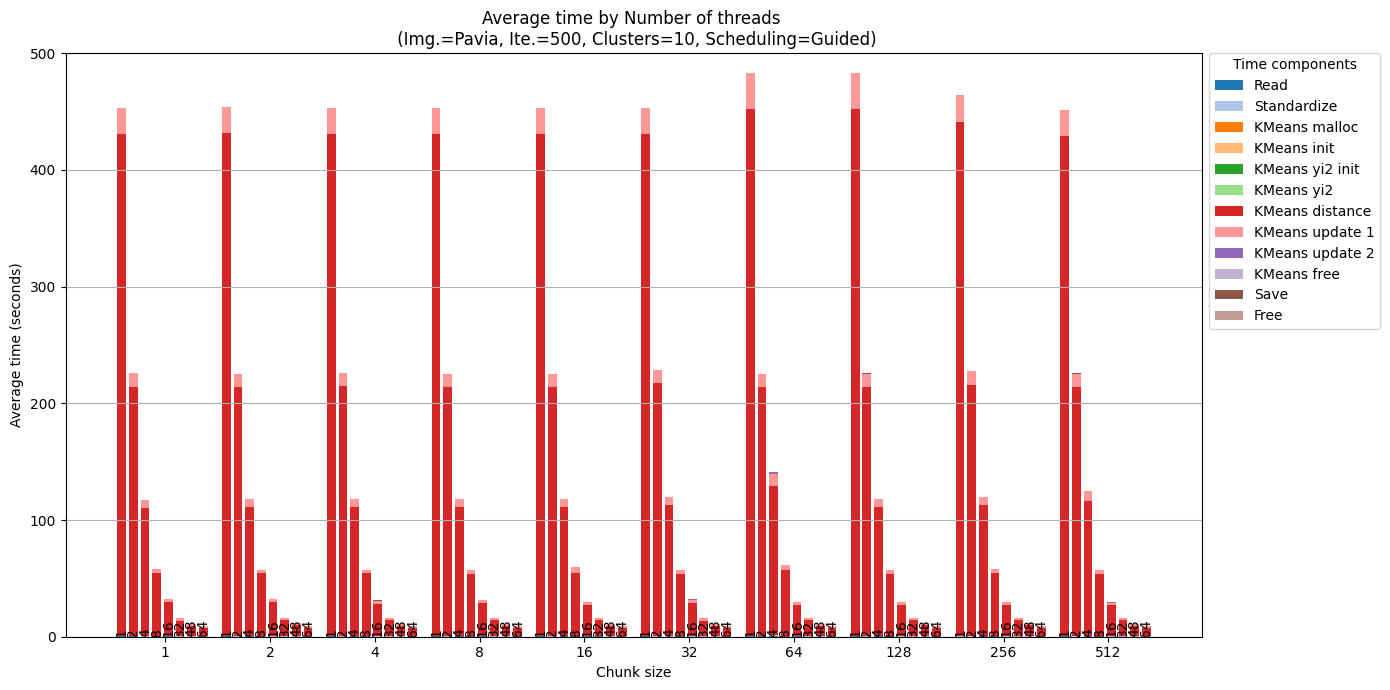

In [10]:
fixed_scheduling_type = 2
fixed_image = 'Pavia'

filtered_data = data[(data['scheduling_type'] == fixed_scheduling_type) & (data['image'] == fixed_image)]

grouped = filtered_data.groupby(['chunk_size', 'num_threads']).mean(numeric_only=True).reset_index()

chunk_sizes = sorted(grouped['chunk_size'].unique())
thread_values = sorted(grouped['num_threads'].unique())
time_components = ['read', 'standardize', 'kmeans_malloc', 'kmeans_init', 'kmeans_yi2_init', 'kmeans_yi2', 'kmeans_distance', 'kmeans_update_1', 'kmeans_update_2', 'kmeans_free', 'save', 'free']
labels = [headers[columns.index(comp)] for comp in time_components]

bar_width = 0.15
bar_spacing = 0.05
group_width = (bar_width + bar_spacing) * len(thread_values)
x = np.arange(len(chunk_sizes)) * (group_width + 0.2)

colors = plt.cm.tab20.colors

fig, ax = plt.subplots(figsize=(14, 7))

for i, thread_value in enumerate(thread_values):

	bottoms = np.zeros(len(chunk_sizes))

	for j, comp in enumerate(time_components):

		comp_values = []

		for chunk in chunk_sizes:

			row = grouped[(grouped['chunk_size'] == chunk) & (grouped['num_threads'] == thread_value)]
			val = row[comp].values[0] if not row.empty else 0
			comp_values.append(val)

		bar_positions = x + i * (bar_width + bar_spacing)

		bars = ax.bar(bar_positions, comp_values, bottom=bottoms, width=bar_width, label=comp if i == 0 else "", color=colors[j])
		bottoms += np.array(comp_values)

	total_heights = bottoms
	bar_positions = x + i * (bar_width + bar_spacing)

	for xpos, height in zip(bar_positions, total_heights):

		ax.text(xpos, 0.015, thread_value, ha='center', va='bottom', rotation=90)

ax.set_ylim(0, 500)
ax.set_xticks(x + group_width / 2 - bar_spacing)
ax.set_xticklabels(chunk_sizes)
ax.set_xlabel('Chunk size')
ax.set_ylabel('Average time (seconds)')
ax.set_title(f'Average time by Number of threads \n (Img.={fixed_image}, Ite.=500, Clusters=10, Scheduling={scheduling_types[fixed_scheduling_type]})')
ax.legend(title='Time components', labels=labels, loc='upper left', bbox_to_anchor=(1, 1.0129))
ax.grid(axis='y')

plt.tight_layout()
plt.savefig(os.path.join(images_dir, f'stacked_bar_chunk_threads_avg.{fixed_image.lower()}.png'))
plt.show()


In [11]:
min_threads = data['num_threads'].min()
ref_dataset = data[data['num_threads'] == min_threads]

ref_times_init = ref_dataset.groupby(['image', 'scheduling_type', 'chunk_size'])['kmeans_init'].mean()
ref_times_yi2_init = ref_dataset.groupby(['image', 'scheduling_type', 'chunk_size'])['kmeans_yi2_init'].mean()

ref_times_yi2 = ref_dataset.groupby(['image', 'scheduling_type', 'chunk_size'])['kmeans_yi2'].mean()
ref_times_distance = ref_dataset.groupby(['image', 'scheduling_type', 'chunk_size'])['kmeans_distance'].mean()
ref_times_update_1 = ref_dataset.groupby(['image', 'scheduling_type', 'chunk_size'])['kmeans_update_1'].mean()
ref_times_update_2 = ref_dataset.groupby(['image', 'scheduling_type', 'chunk_size'])['kmeans_update_2'].mean()

summary_data = []

for (threads_value, image, sched_type, chunk_size), group in data.groupby(['num_threads', 'image', 'scheduling_type', 'chunk_size']):

	# Sequential part
	mean_malloc_time = group['kmeans_malloc'].mean()
	mean_free_time = group['kmeans_free'].mean()

	# Parallel part
	mean_init_time = group['kmeans_init'].mean()			# This 2 represent the initialization of the kmeans
	mean_yi2_init_time = group['kmeans_yi2_init'].mean()	# Only calling 1 time during the algorithm run

	# Parallel part, each of this is called for each chunk, so the value is the acumulated time for all iterations
	mean_yi2_time = group['kmeans_yi2'].mean()
	mean_distance_time = group['kmeans_distance'].mean()
	mean_update_1_time = group['kmeans_update_1'].mean()
	mean_update_2_time = group['kmeans_update_2'].mean()

	mean_total_time = mean_malloc_time + mean_init_time + mean_free_time + mean_yi2_init_time + mean_yi2_time + mean_distance_time + mean_update_1_time + mean_update_2_time

	ref_time_init = ref_times_init.get((image, sched_type, chunk_size), None)
	speedup_init = ref_time_init / mean_init_time
	efficiency_init = speedup_init / threads_value

	ref_time_yi2_init = ref_times_yi2_init.get((image, sched_type, chunk_size), None)
	speedup_yi2_init = ref_time_yi2_init / mean_yi2_init_time
	efficiency_yi2_init = speedup_yi2_init / threads_value

	ref_time_yi2 = ref_times_yi2.get((image, sched_type, chunk_size), None)
	speedup_yi2 = ref_time_yi2 / mean_yi2_time
	efficiency_yi2 = speedup_yi2 / threads_value

	ref_time_distance = ref_times_distance.get((image, sched_type, chunk_size), None)
	speedup_distance = ref_time_distance / mean_distance_time
	efficiency_distance = speedup_distance / threads_value

	ref_time_update_1 = ref_times_update_1.get((image, sched_type, chunk_size), None)
	speedup_update_1 = ref_time_update_1 / mean_update_1_time
	efficiency_update_1 = speedup_update_1 / threads_value

	ref_time_update_2 = ref_times_update_2.get((image, sched_type, chunk_size), None)
	speedup_update_2 = ref_time_update_2 / mean_update_2_time
	efficiency_update_2 = speedup_update_2 / threads_value

	summary_data.append([
		threads_value,
		image,
		sched_type,
		scheduling_types[sched_type],
		chunk_size,
		mean_malloc_time,
		mean_free_time,
		mean_init_time,
		mean_yi2_init_time,
		mean_yi2_time,
		mean_distance_time,
		mean_update_1_time,
		mean_update_2_time,
		mean_total_time,
		ref_time_init,
		ref_time_yi2_init,
		ref_time_yi2,
		ref_time_distance,
		ref_time_update_1,
		ref_time_update_2,
		speedup_init,
		speedup_yi2_init,
		speedup_yi2,
		speedup_distance,
		speedup_update_1,
		speedup_update_2,
		efficiency_init,
		efficiency_yi2_init,
		efficiency_yi2,
		efficiency_distance,
		efficiency_update_1,
		efficiency_update_2,
	])

summary_df = pd.DataFrame(summary_data, columns=[
	'Number of threads',
	'Image',
	'Scheduling type',
	'Scheduling type name',
	'Chunk size',
	'Mean malloc time',
	'Mean free time',
	'Mean init time',
	'Mean yi2 init time',
	'Mean yi2 time',
	'Mean distance time',
	'Mean update time 1',
	'Mean update time 2',
	'Mean total time',
	'Ref init time',
	'Ref yi2 init time',
	'Ref yi2 time',
	'Ref distance time',
	'Ref update time 1',
	'Ref update time 2',
	'Speedup init',
	'Speedup yi2 init',
	'Speedup yi2',
	'Speedup distance',
	'Speedup update 1',
	'Speedup update 2',
	'Efficiency init',
	'Efficiency yi2 init',
	'Efficiency yi2',
	'Efficiency distance',
	'Efficiency update 1',
	'Efficiency update 2',
])

summary_df = summary_df.round(5)

display(summary_df)

# Print summary table
latex_table = summary_df.to_latex(index=False, float_format="%.5f")
print(latex_table)


Number of threads    Image  Scheduling type Scheduling type name  \
0                    1  Barbara                0               Static   
1                    1  Barbara                0               Static   
2                    1  Barbara                0               Static   
3                    1  Barbara                0               Static   
4                    1  Barbara                0               Static   
..                 ...      ...              ...                  ...   
635                 64    Pavia                3                 Auto   
636                 64    Pavia                3                 Auto   
637                 64    Pavia                3                 Auto   
638                 64    Pavia                3                 Auto   
639                 64    Pavia                3                 Auto   

     Chunk size  Mean malloc time  Mean free time  Mean init time  \
0             1           0.00002             0.0         0.00002   
1             2           0.00002             0.0         0.00003   
2             4           0.00002             0.0         0.00002   
3             8           0.00002             0.0         0.00002   
4            16           0.00001             0.0         0.00002   
..          ...               ...             ...             ...   
635          32           0.00001             0.0         0.00150   
636          64           0.00001             0.0         0.00141   
637         128           0.00001             0.0         0.00140   
638         256           0.00001             0.0         0.00138   
639         512           0.00001             0.0         0.00133   

     Mean yi2 init time  Mean yi2 time  ...  Speedup yi2  Speedup distance  \
0               0.00000        0.00166  ...      1.00000           1.00000   
1               0.00000        0.00188  ...      1.00000           1.00000   
2               0.00000        0.00165  ...      1.00000           1.00000   
3               0.00000        0.00165  ...      1.00000           1.00000   
4               0.00000        0.00164  ...      1.00000           1.00000   
..                  ...            ...  ...          ...               ...   
635             0.00001        0.01758  ...      0.04626          66.44979   
636             0.00001        0.02442  ...      0.03385          66.53028   
637             0.00001        0.09121  ...      0.00831          61.81532   
638             0.00001        0.00724  ...      0.10118          63.08681   
639             0.00001        0.08726  ...      0.00841          61.74413   

     Speedup update 1  Speedup update 2  Efficiency init  Efficiency yi2 init  \
0             1.00000           1.00000          1.00000              1.00000   
1             1.00000           1.00000          1.00000              1.00000   
2             1.00000           1.00000          1.00000              1.00000   
3             1.00000           1.00000          1.00000              1.00000   
4             1.00000           1.00000          1.00000              1.00000   
..                ...               ...              ...                  ...   
635          16.64496           0.05287          0.00020              0.00254   
636          16.20963           0.04750          0.00023              0.00242   
637          12.32002           0.00946          0.00011              0.00252   
638          13.16590           0.11500          0.00012              0.00254   
639          11.94643           0.01000          0.00012              0.00263   

     Efficiency yi2  Efficiency distance  Efficiency update 1  \
0           1.00000              1.00000              1.00000   
1           1.00000              1.00000              1.00000   
2           1.00000              1.00000              1.00000   
3           1.00000              1.00000              1.00000   
4           1.00000              1.00000              1.00000   

\begin{tabular}{rlrlrrrrrrrrrrrrrrrrrrrrrrrrrrrr}
\toprule
Number of threads & Image & Scheduling type & Scheduling type name & Chunk size & Mean malloc time & Mean free time & Mean init time & Mean yi2 init time & Mean yi2 time & Mean distance time & Mean update time 1 & Mean update time 2 & Mean total time & Ref init time & Ref yi2 init time & Ref yi2 time & Ref distance time & Ref update time 1 & Ref update time 2 & Speedup init & Speedup yi2 init & Speedup yi2 & Speedup distance & Speedup update 1 & Speedup update 2 & Efficiency init & Efficiency yi2 init & Efficiency yi2 & Efficiency distance & Efficiency update 1 & Efficiency update 2 \\
\midrule
1 & Barbara & 0 & Static & 1 & 0.00002 & 0.00000 & 0.00002 & 0.00000 & 0.00166 & 1177.91188 & 58.73170 & 0.00159 & 1236.64687 & 0.00002 & 0.00000 & 0.00166 & 1177.91188 & 58.73170 & 0.00159 & 1.00000 & 1.00000 & 1.00000 & 1.00000 & 1.00000 & 1.00000 & 1.00000 & 1.00000 & 1.00000 & 1.00000 & 1.00000 & 1.00000 \\
1 & Barbara & 0 & Static &

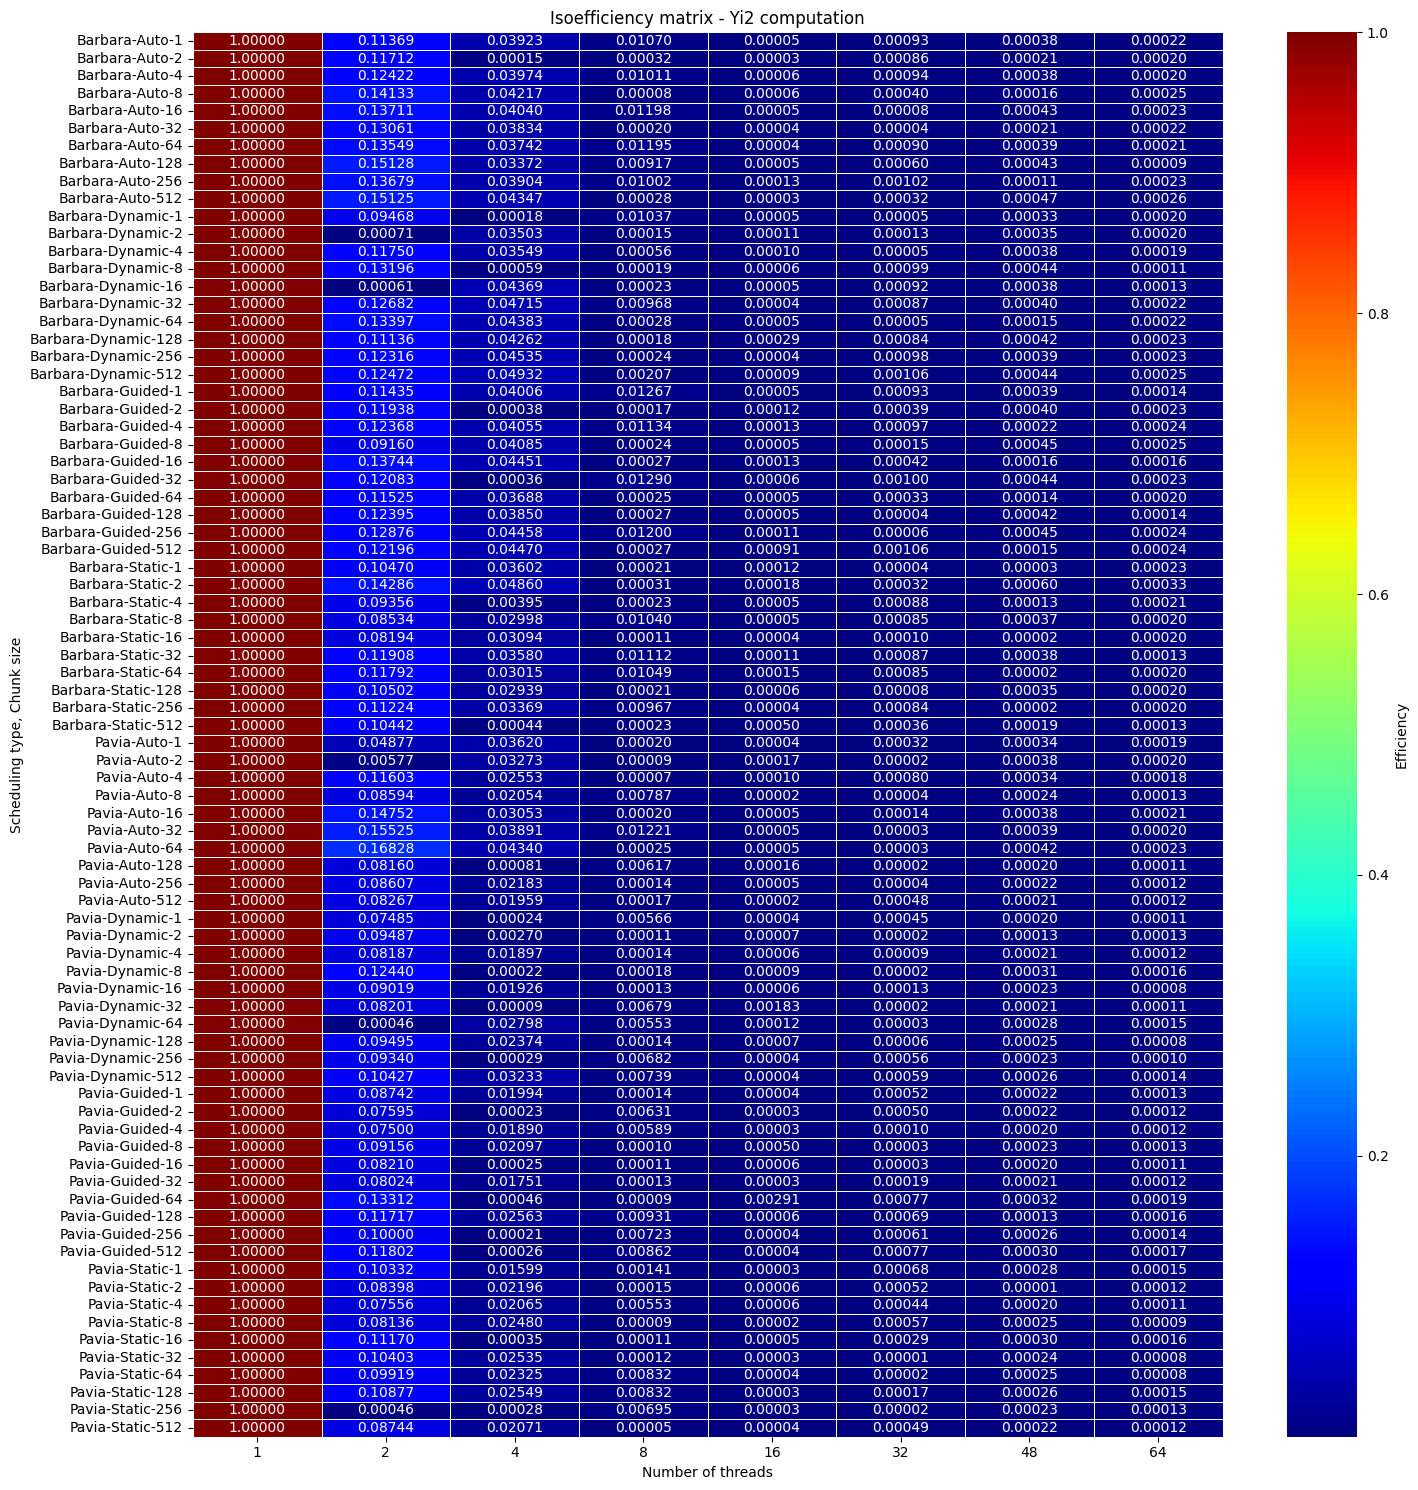

In [12]:
auto_pivot = pd.pivot_table(
	summary_df,
	values='Efficiency init',
	index=['Image', 'Scheduling type name', 'Chunk size'],
	columns='Number of threads'
)

plt.figure(figsize=(15, 15))

sns.heatmap(auto_pivot, annot=True, fmt=".5f", cmap='jet', cbar_kws={'label': 'Efficiency'}, linewidths=0.5, linecolor='white')

plt.title('Isoefficiency matrix - Yi2 computation')
plt.ylabel('Scheduling type, Chunk size')
plt.xlabel('Number of threads')

plt.tight_layout()

plt.savefig(os.path.join(images_dir, 'isoefficiency_yi2.png'))
plt.savefig(os.path.join(images_dir, 'isoefficiency_yi2.pdf'))

plt.show()


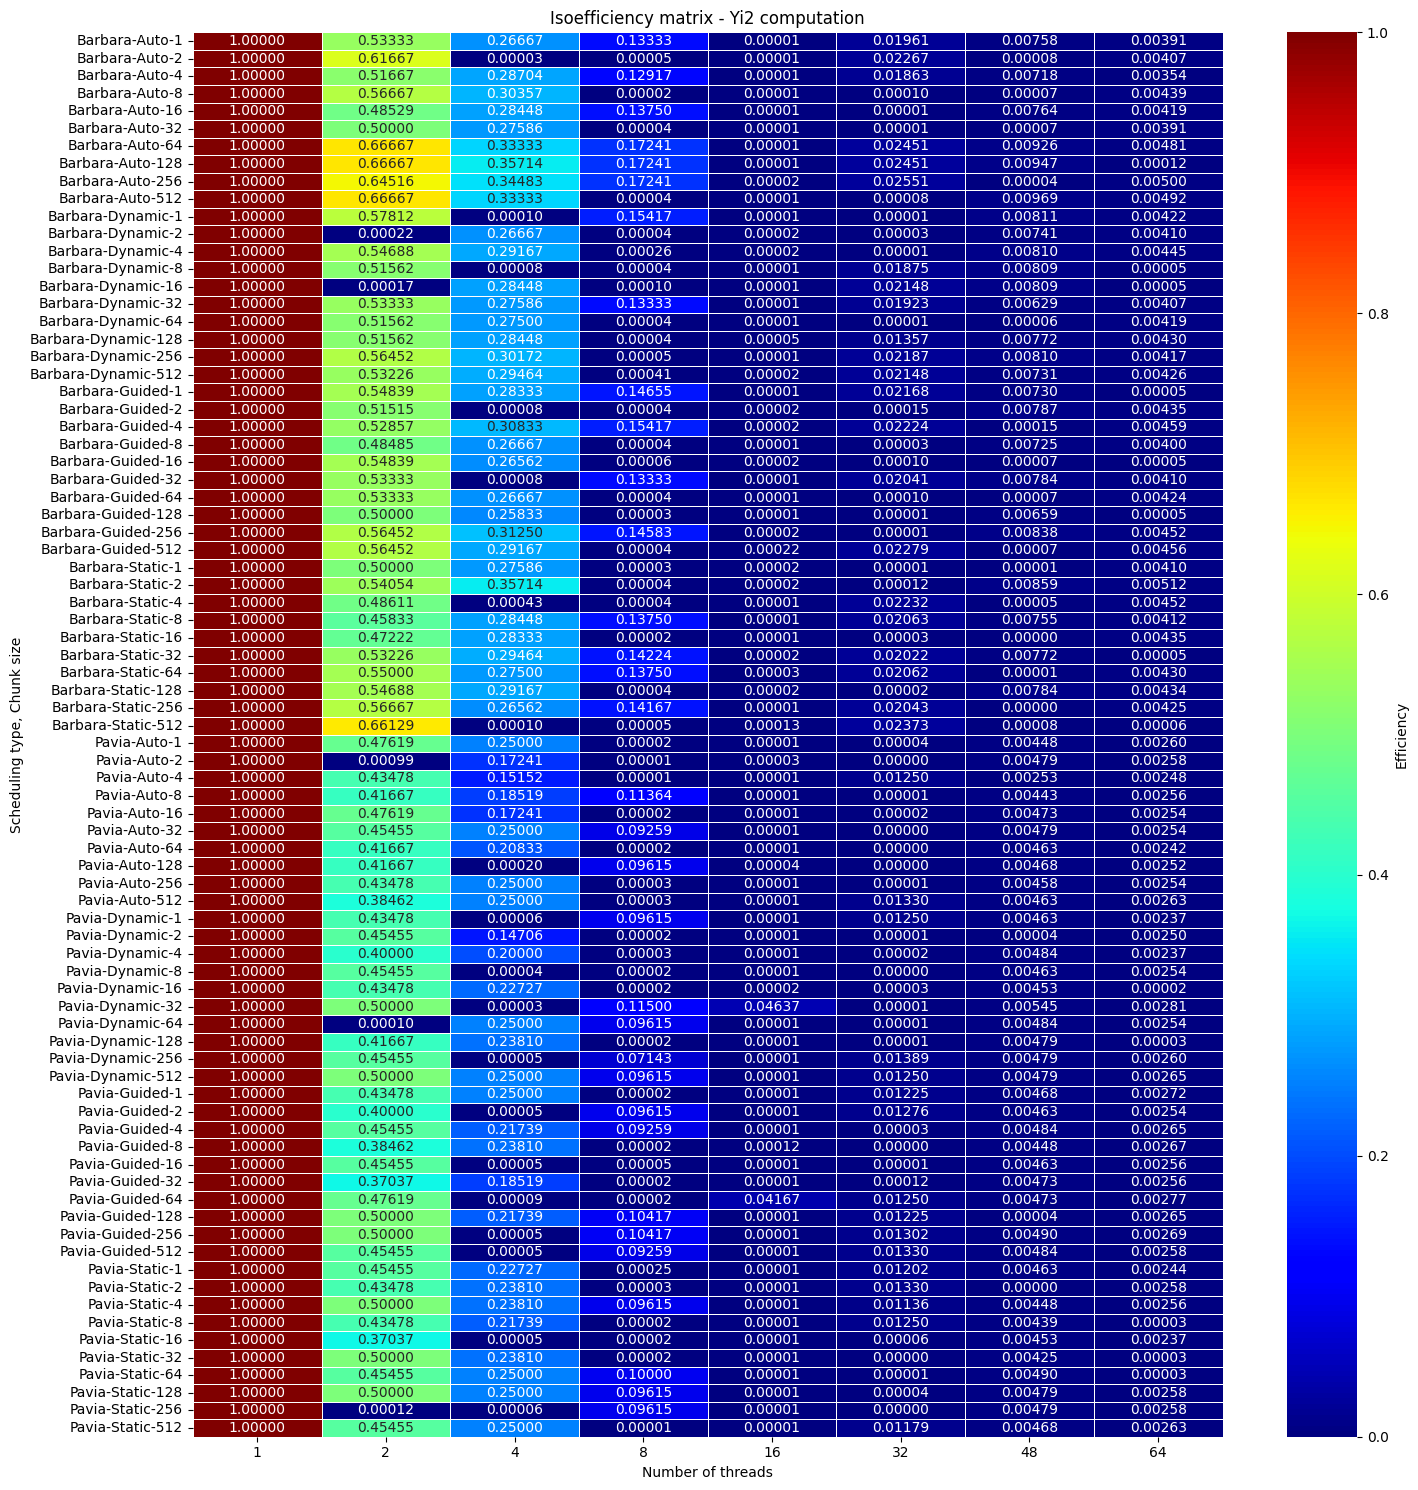

In [13]:
auto_pivot = pd.pivot_table(
	summary_df,
	values='Efficiency yi2 init',
	index=['Image', 'Scheduling type name', 'Chunk size'],
	columns='Number of threads'
)

plt.figure(figsize=(15, 15))

sns.heatmap(auto_pivot, annot=True, fmt=".5f", cmap='jet', cbar_kws={'label': 'Efficiency'}, linewidths=0.5, linecolor='white')

plt.title('Isoefficiency matrix - Yi2 computation')
plt.ylabel('Scheduling type, Chunk size')
plt.xlabel('Number of threads')

plt.tight_layout()

plt.savefig(os.path.join(images_dir, 'isoefficiency_yi2.png'))
plt.savefig(os.path.join(images_dir, 'isoefficiency_yi2.pdf'))

plt.show()


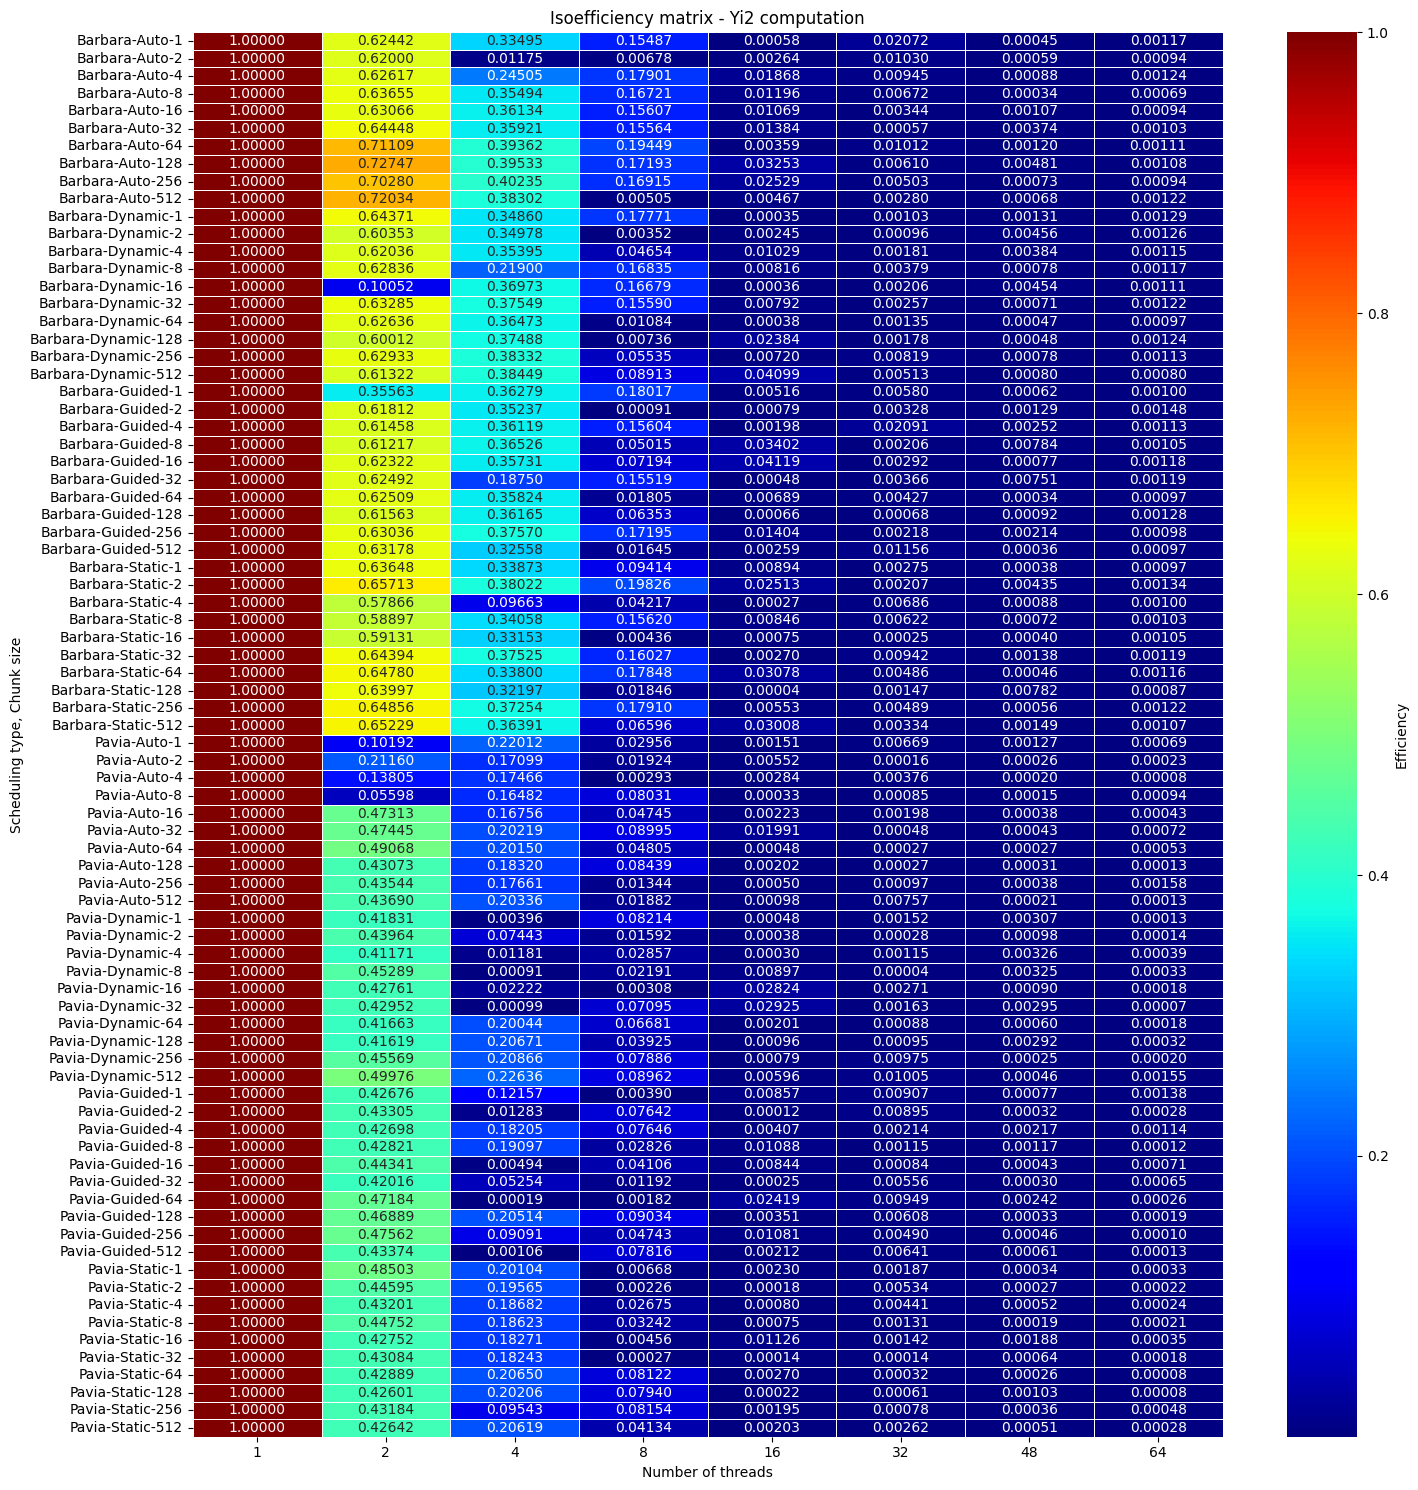

In [14]:
auto_pivot = pd.pivot_table(
	summary_df,
	values='Efficiency yi2',
	index=['Image', 'Scheduling type name', 'Chunk size'],
	columns='Number of threads'
)

plt.figure(figsize=(15, 15))

sns.heatmap(auto_pivot, annot=True, fmt=".5f", cmap='jet', cbar_kws={'label': 'Efficiency'}, linewidths=0.5, linecolor='white')

plt.title('Isoefficiency matrix - Yi2 computation')
plt.ylabel('Scheduling type, Chunk size')
plt.xlabel('Number of threads')

plt.tight_layout()

plt.savefig(os.path.join(images_dir, 'isoefficiency_yi2.png'))
plt.savefig(os.path.join(images_dir, 'isoefficiency_yi2.pdf'))

plt.show()


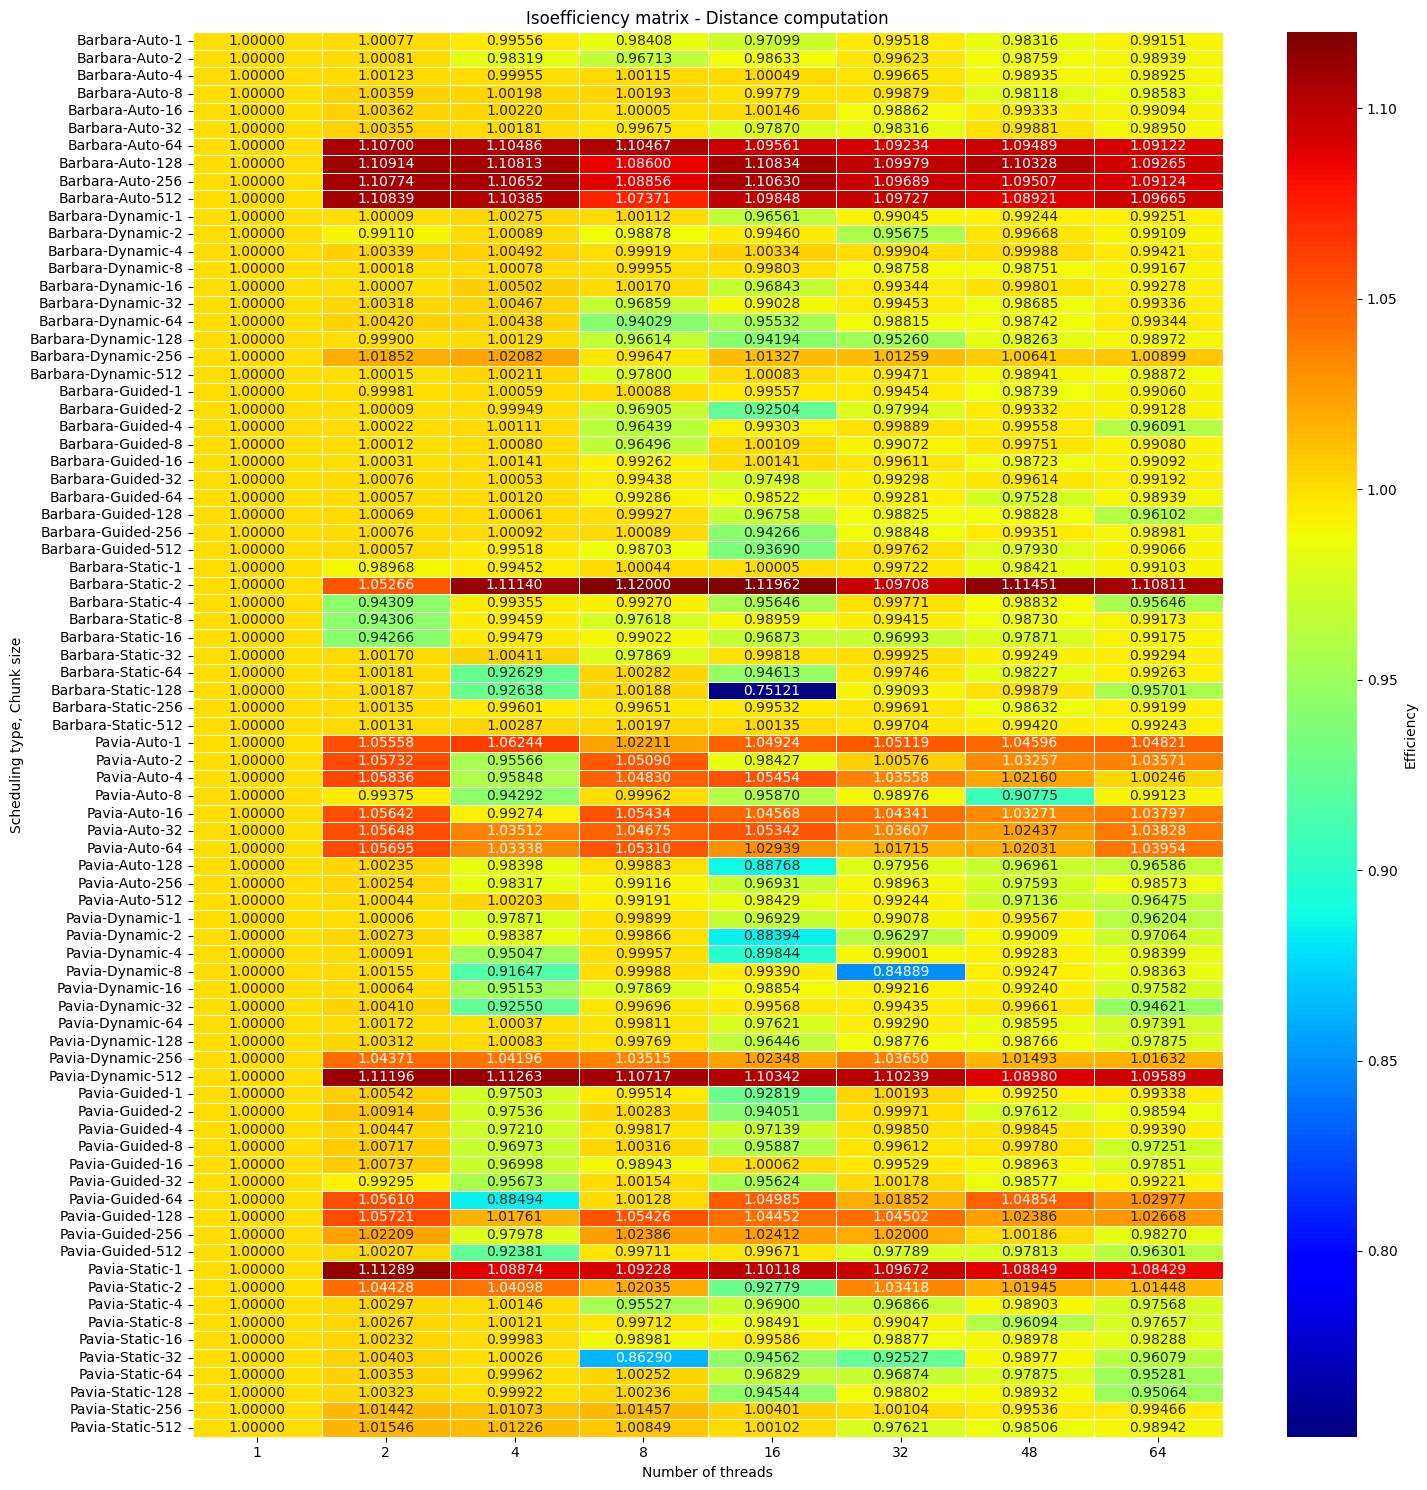

In [15]:
manual_pivot = pd.pivot_table(
	summary_df,
	values='Efficiency distance',
	index=['Image', 'Scheduling type name', 'Chunk size'],
	columns='Number of threads'
)

plt.figure(figsize=(15, 15))

sns.heatmap(manual_pivot, annot=True, fmt=".5f", cmap='jet', cbar_kws={'label': 'Efficiency'}, linewidths=0.5, linecolor='white')

plt.title('Isoefficiency matrix - Distance computation')
plt.ylabel('Scheduling type, Chunk size')
plt.xlabel('Number of threads')

plt.tight_layout()

plt.savefig(os.path.join(images_dir, 'isoefficiency_distance.png'))
plt.savefig(os.path.join(images_dir, 'isoefficiency_distance.pdf'))

plt.show()


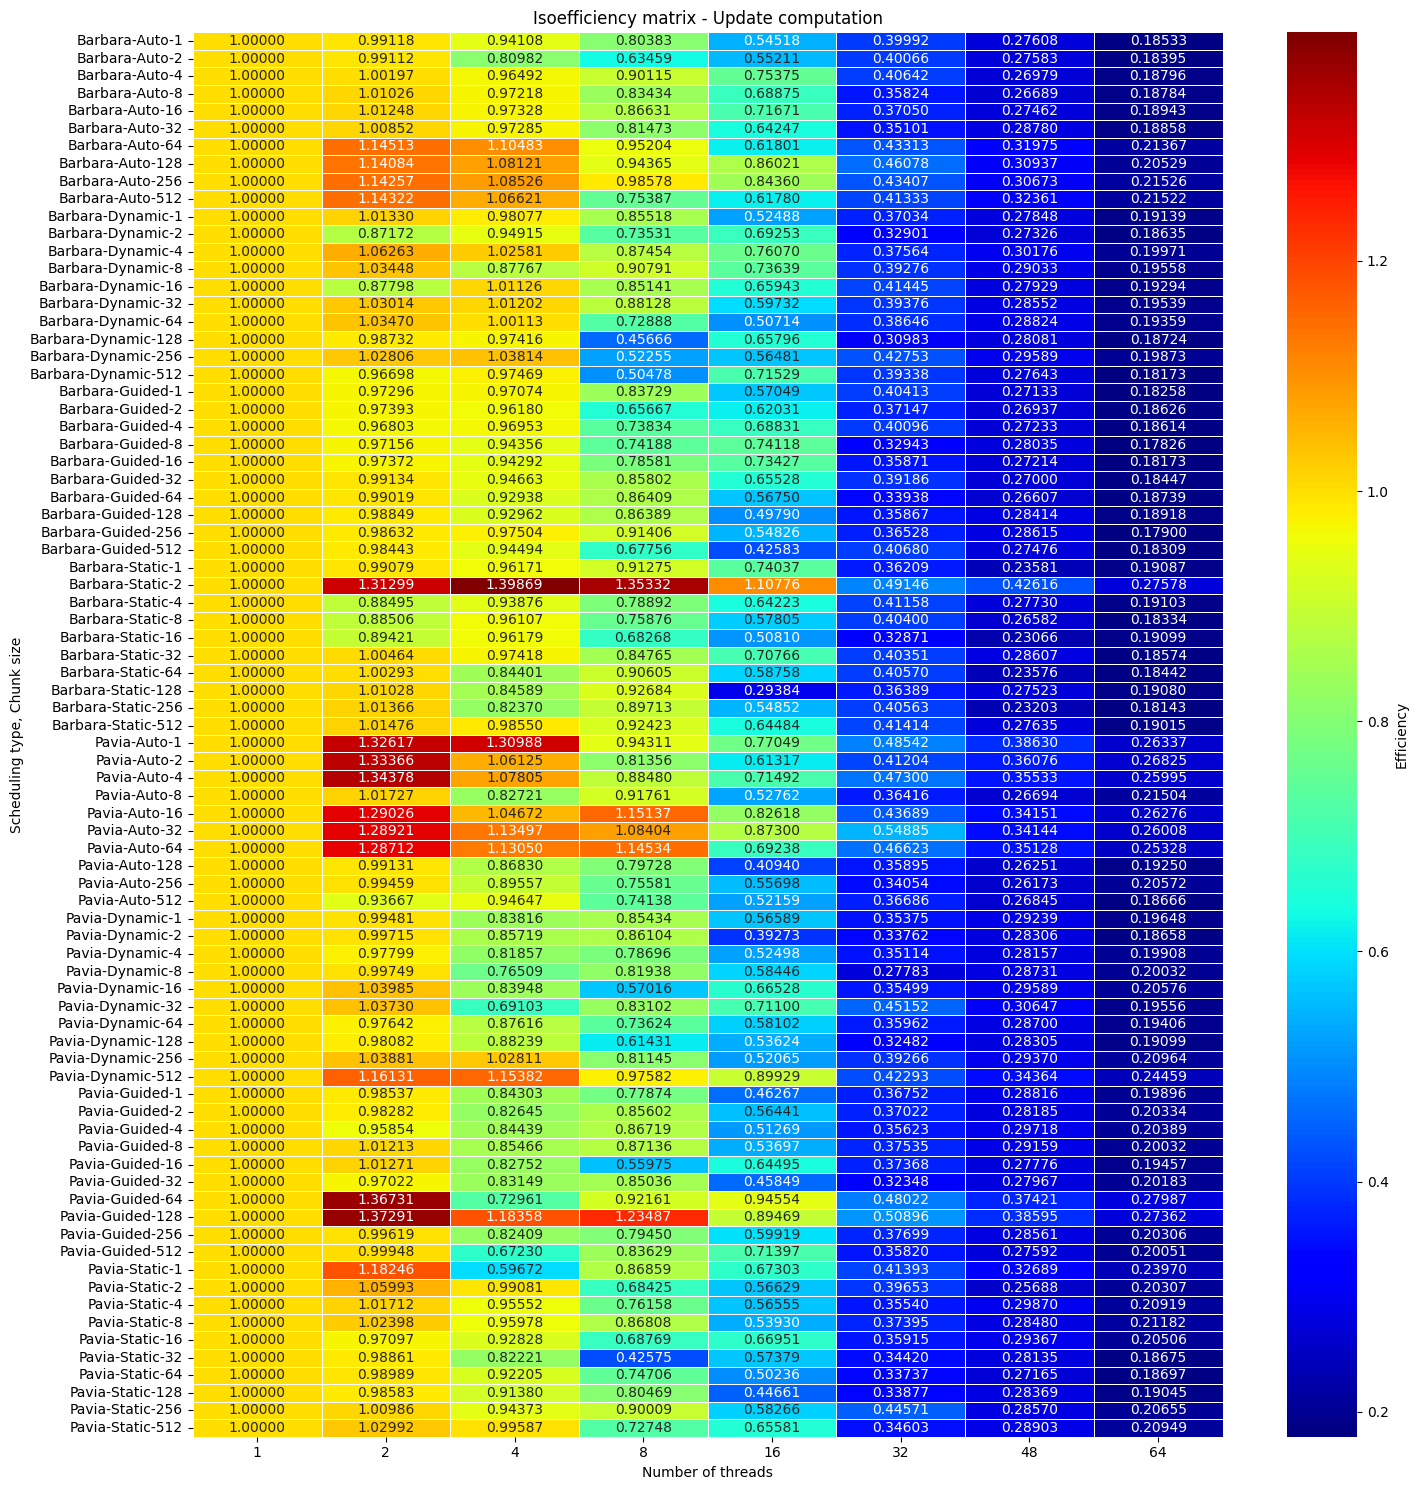

In [16]:
manual_pivot = pd.pivot_table(
	summary_df,
	values='Efficiency update 1',
	index=['Image', 'Scheduling type name', 'Chunk size'],
	columns='Number of threads'
)

plt.figure(figsize=(15, 15))

sns.heatmap(manual_pivot, annot=True, fmt=".5f", cmap='jet', cbar_kws={'label': 'Efficiency'}, linewidths=0.5, linecolor='white')

plt.title('Isoefficiency matrix - Update computation')
plt.ylabel('Scheduling type, Chunk size')
plt.xlabel('Number of threads')

plt.tight_layout()

plt.savefig(os.path.join(images_dir, 'isoefficiency_update_1.png'))
plt.savefig(os.path.join(images_dir, 'isoefficiency_update_1.pdf'))

plt.show()


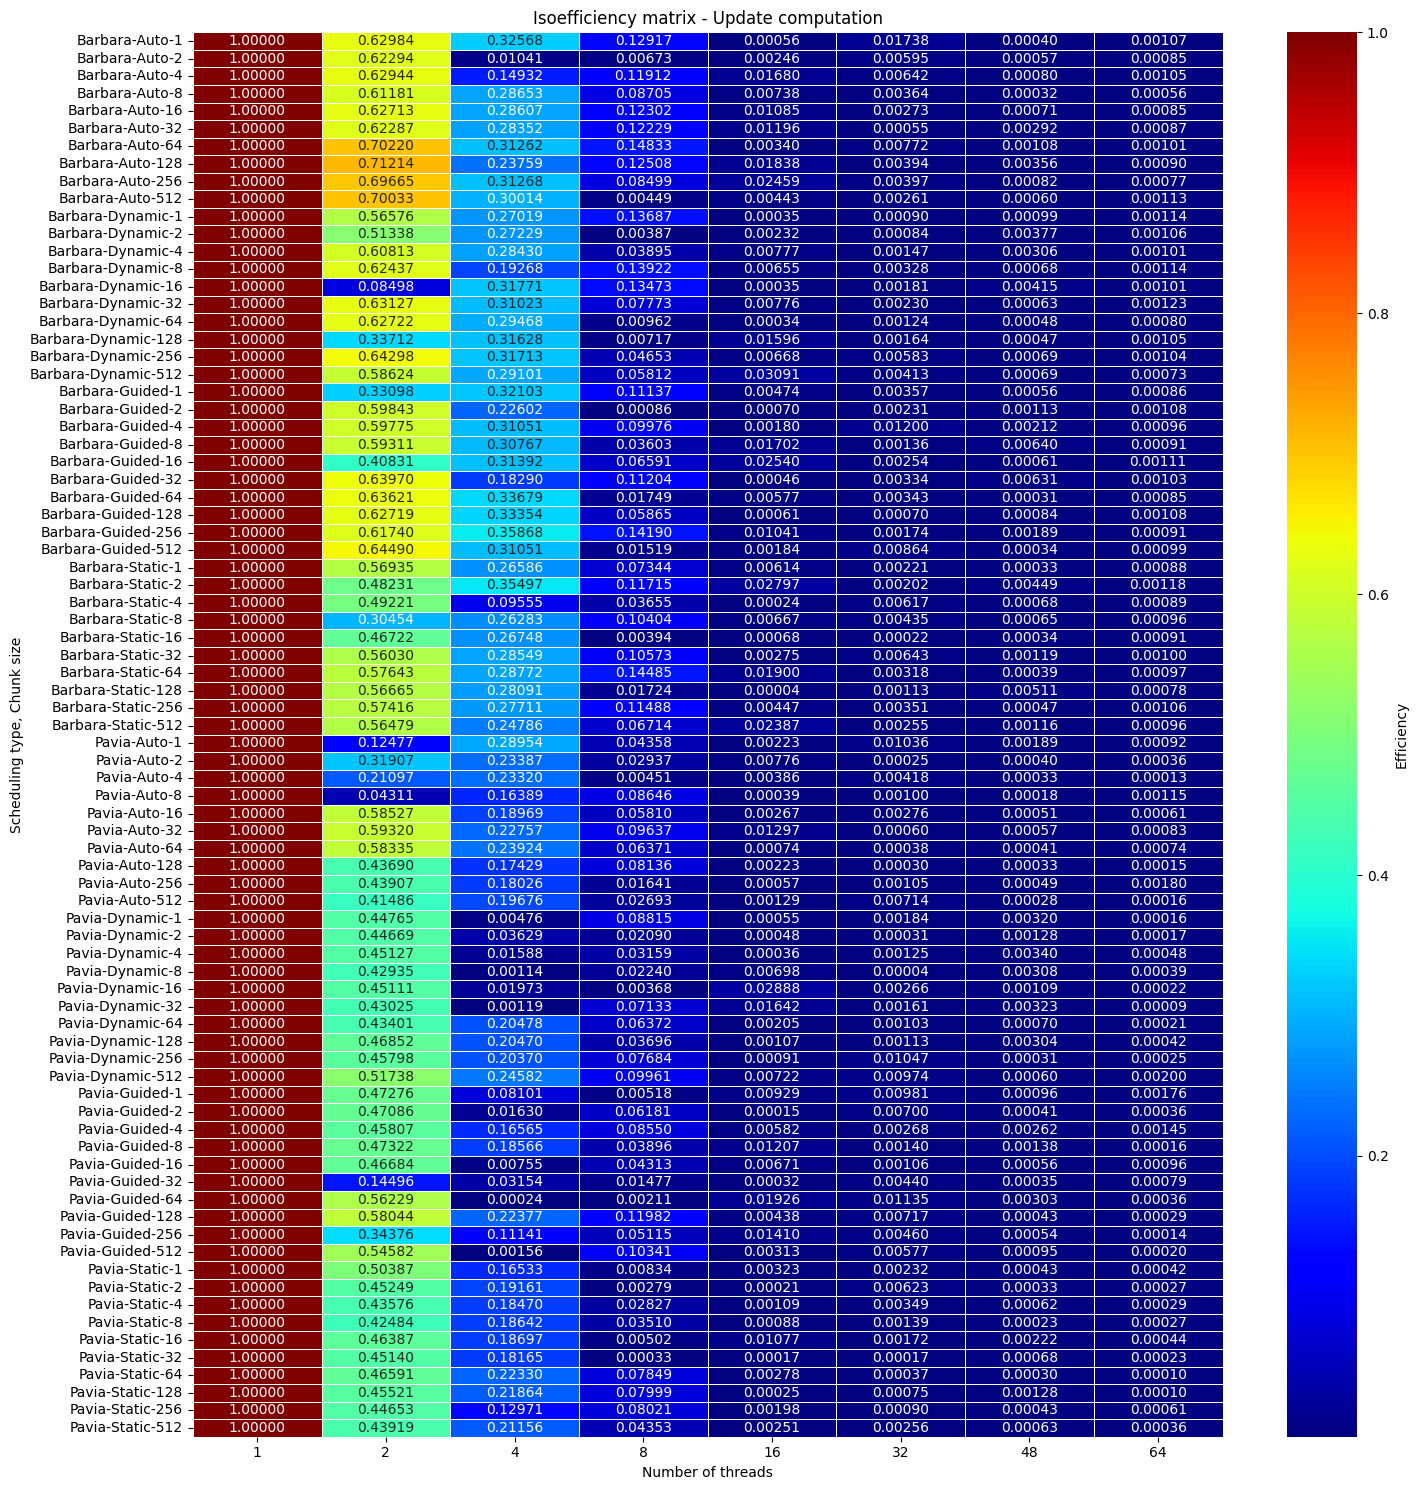

In [17]:
manual_pivot = pd.pivot_table(
	summary_df,
	values='Efficiency update 2',
	index=['Image', 'Scheduling type name', 'Chunk size'],
	columns='Number of threads'
)

plt.figure(figsize=(15, 15))

sns.heatmap(manual_pivot, annot=True, fmt=".5f", cmap='jet', cbar_kws={'label': 'Efficiency'}, linewidths=0.5, linecolor='white')

plt.title('Isoefficiency matrix - Update computation')
plt.ylabel('Scheduling type, Chunk size')
plt.xlabel('Number of threads')

plt.tight_layout()

plt.savefig(os.path.join(images_dir, 'isoefficiency_update_2.png'))
plt.savefig(os.path.join(images_dir, 'isoefficiency_update_2.pdf'))

plt.show()


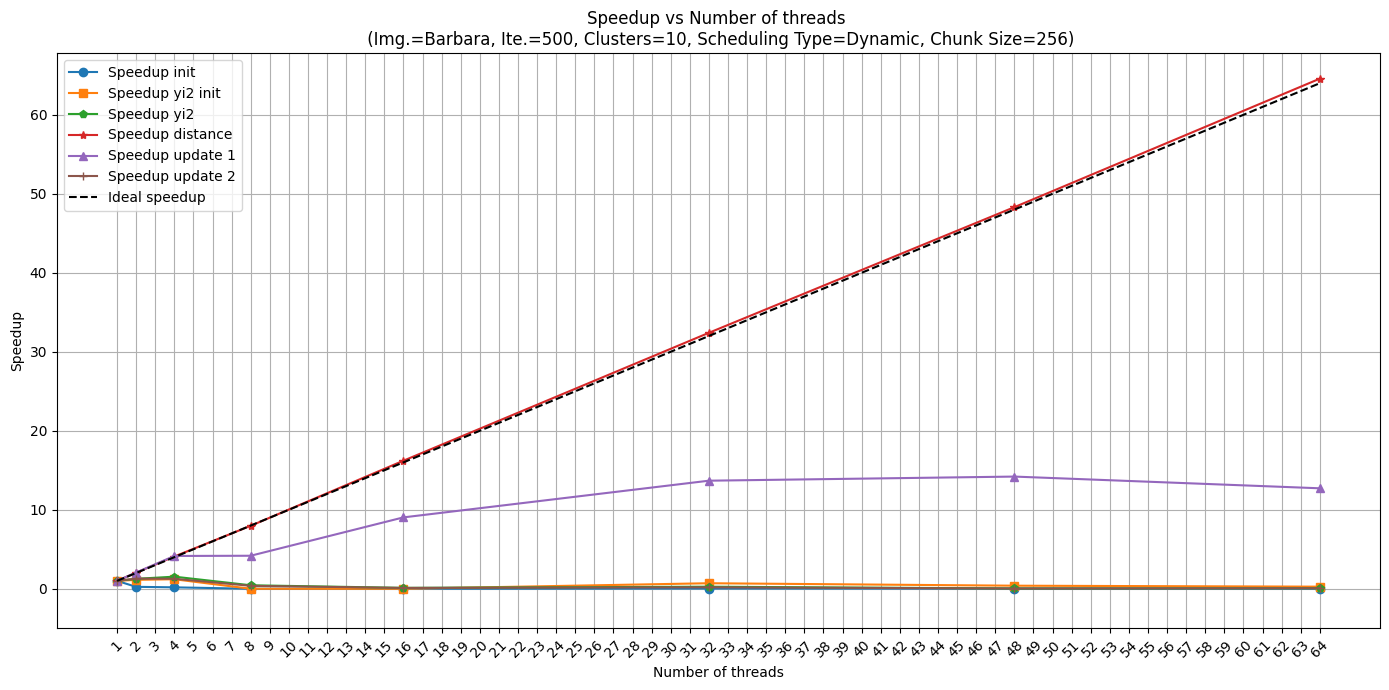

In [18]:
fixed_image = 'Barbara'
fixed_scheduling_type = 1
fixed_chunk_size = 256

filtered_df = summary_df[(summary_df['Scheduling type'] == fixed_scheduling_type) & (summary_df['Chunk size'] == fixed_chunk_size) & (summary_df['Image'] == fixed_image)]

filtered_df = filtered_df.sort_values('Number of threads')
max_threads = filtered_df['Number of threads'].max()

plt.figure(figsize=(14, 7))

plt.plot(filtered_df['Number of threads'], filtered_df['Speedup init'], marker='o', label='Speedup init')
plt.plot(filtered_df['Number of threads'], filtered_df['Speedup yi2 init'], marker='s', label='Speedup yi2 init')
plt.plot(filtered_df['Number of threads'], filtered_df['Speedup yi2'], marker='p', label='Speedup yi2')
plt.plot(filtered_df['Number of threads'], filtered_df['Speedup distance'], marker='*', label='Speedup distance')
plt.plot(filtered_df['Number of threads'], filtered_df['Speedup update 1'], marker='^', label='Speedup update 1')
plt.plot(filtered_df['Number of threads'], filtered_df['Speedup update 2'], marker='+', label='Speedup update 2')

plt.plot([1, max_threads], [1, max_threads], 'k--', label='Ideal speedup')

plt.title(f'Speedup vs Number of threads \n (Img.={fixed_image}, Ite.=500, Clusters=10, Scheduling Type={scheduling_types[fixed_scheduling_type]}, Chunk Size={fixed_chunk_size})')
plt.xlabel('Number of threads')
plt.ylabel('Speedup')

plt.xticks(range(1, max_threads + 1), rotation=45)
plt.yticks()
plt.ylim(bottom=-5)

plt.grid()

plt.legend()

plt.tight_layout()

plt.savefig(os.path.join(images_dir, f'speedup_vs_threads.{fixed_image.lower()}.png'))
plt.savefig(os.path.join(images_dir, f'speedup_vs_threads.{fixed_image.lower()}.pdf'))

plt.show()


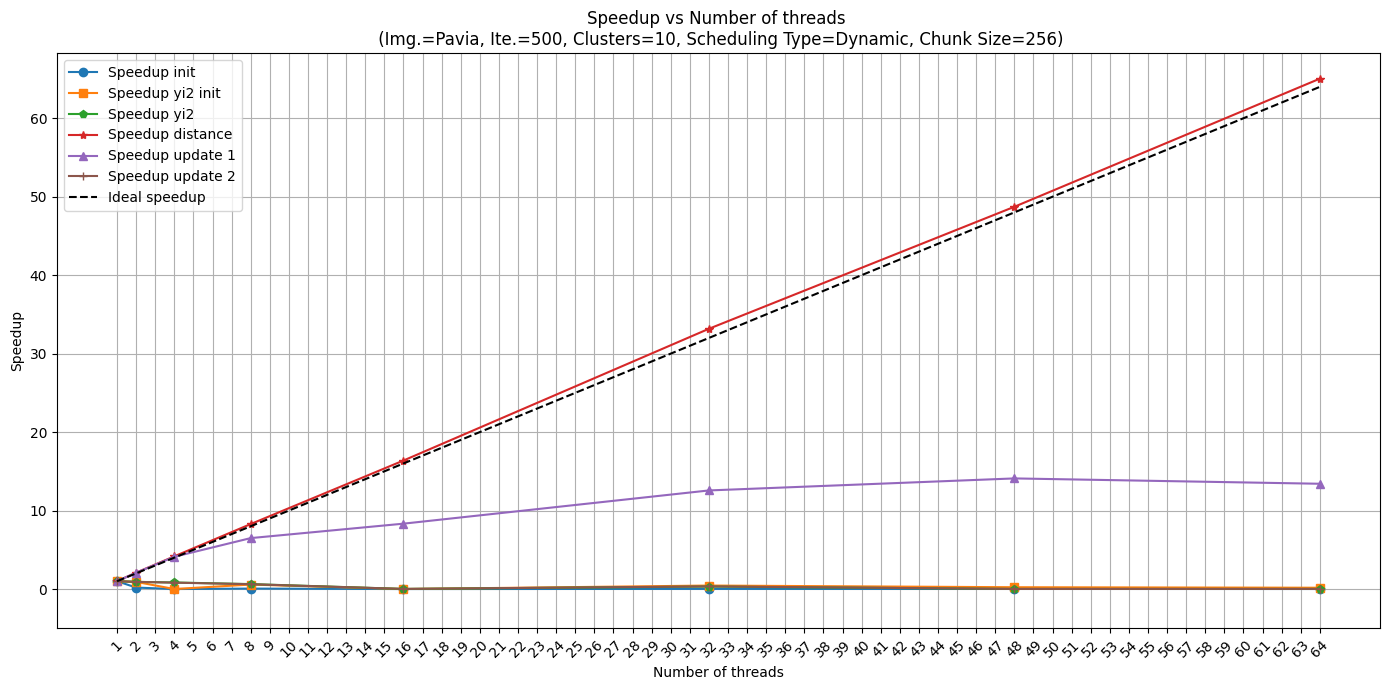

In [19]:
fixed_image = 'Pavia'
fixed_scheduling_type = 1
fixed_chunk_size = 256

filtered_df = summary_df[(summary_df['Scheduling type'] == fixed_scheduling_type) & (summary_df['Chunk size'] == fixed_chunk_size) & (summary_df['Image'] == fixed_image)]

filtered_df = filtered_df.sort_values('Number of threads')
max_threads = filtered_df['Number of threads'].max()

plt.figure(figsize=(14, 7))

plt.plot(filtered_df['Number of threads'], filtered_df['Speedup init'], marker='o', label='Speedup init')
plt.plot(filtered_df['Number of threads'], filtered_df['Speedup yi2 init'], marker='s', label='Speedup yi2 init')
plt.plot(filtered_df['Number of threads'], filtered_df['Speedup yi2'], marker='p', label='Speedup yi2')
plt.plot(filtered_df['Number of threads'], filtered_df['Speedup distance'], marker='*', label='Speedup distance')
plt.plot(filtered_df['Number of threads'], filtered_df['Speedup update 1'], marker='^', label='Speedup update 1')
plt.plot(filtered_df['Number of threads'], filtered_df['Speedup update 2'], marker='+', label='Speedup update 2')

plt.plot([1, max_threads], [1, max_threads], 'k--', label='Ideal speedup')

plt.title(f'Speedup vs Number of threads \n (Img.={fixed_image}, Ite.=500, Clusters=10, Scheduling Type={scheduling_types[fixed_scheduling_type]}, Chunk Size={fixed_chunk_size})')
plt.xlabel('Number of threads')
plt.ylabel('Speedup')

plt.xticks(range(1, max_threads + 1), rotation=45)
plt.yticks()
plt.ylim(bottom=-5)

plt.grid()

plt.legend()

plt.tight_layout()

plt.savefig(os.path.join(images_dir, f'speedup_vs_threads.{fixed_image.lower()}.png'))
plt.savefig(os.path.join(images_dir, f'speedup_vs_threads.{fixed_image.lower()}.pdf'))

plt.show()


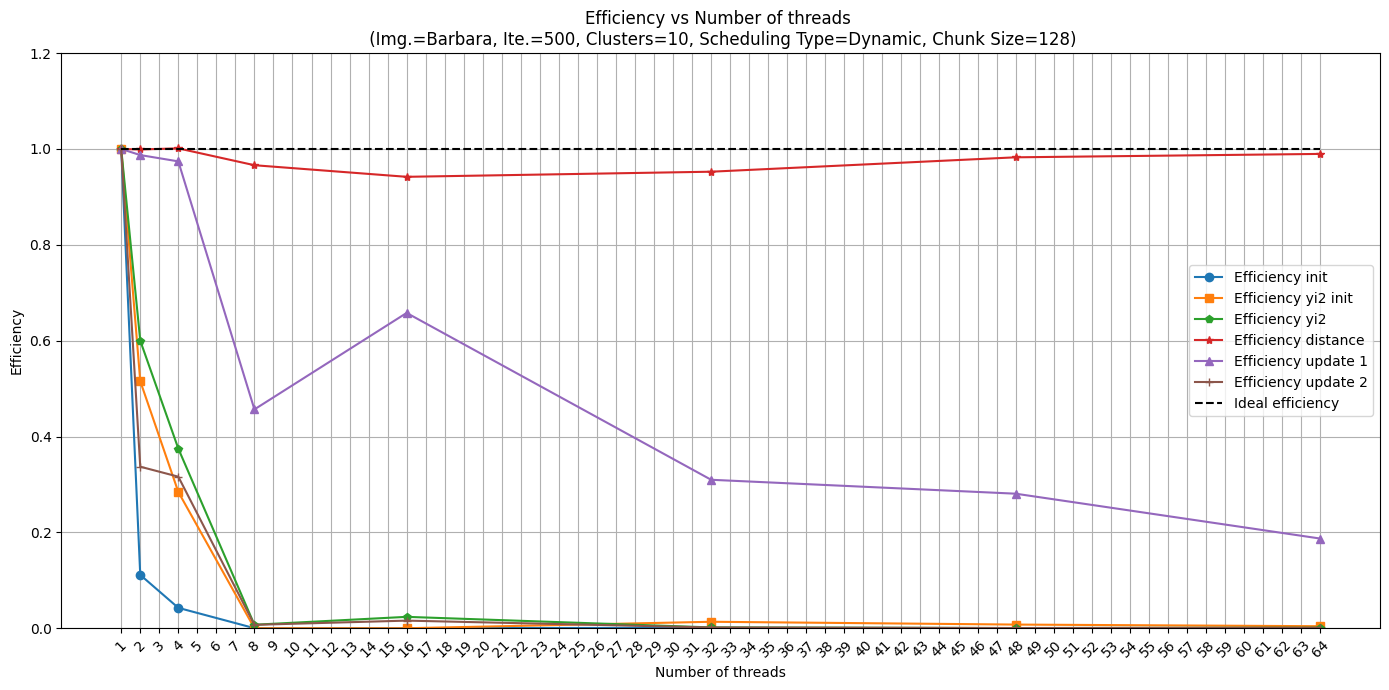

In [20]:
fixed_image = 'Barbara'
fixed_scheduling_type = 1
fixed_chunk_size = 128

filtered_df = summary_df[(summary_df['Scheduling type'] == fixed_scheduling_type) & (summary_df['Chunk size'] == fixed_chunk_size) & (summary_df['Image'] == fixed_image)]

filtered_df = filtered_df.sort_values('Number of threads')
max_threads = filtered_df['Number of threads'].max()

plt.figure(figsize=(14, 7))

plt.plot(filtered_df['Number of threads'], filtered_df['Efficiency init'], marker='o', label='Efficiency init')
plt.plot(filtered_df['Number of threads'], filtered_df['Efficiency yi2 init'], marker='s', label='Efficiency yi2 init')
plt.plot(filtered_df['Number of threads'], filtered_df['Efficiency yi2'], marker='p', label='Efficiency yi2')
plt.plot(filtered_df['Number of threads'], filtered_df['Efficiency distance'], marker='*', label='Efficiency distance')
plt.plot(filtered_df['Number of threads'], filtered_df['Efficiency update 1'], marker='^', label='Efficiency update 1')
plt.plot(filtered_df['Number of threads'], filtered_df['Efficiency update 2'], marker='+', label='Efficiency update 2')

plt.plot([1, max_threads], [1, 1], 'k--', label='Ideal efficiency')

plt.title(f'Efficiency vs Number of threads \n (Img.={fixed_image}, Ite.=500, Clusters=10, Scheduling Type={scheduling_types[fixed_scheduling_type]}, Chunk Size={fixed_chunk_size})')
plt.xlabel('Number of threads')
plt.ylabel('Efficiency')

plt.xticks(range(1, max_threads + 1), rotation=45)
plt.yticks()
plt.ylim(0, 1.2)

plt.grid()

plt.legend()

plt.tight_layout()

plt.savefig(os.path.join(images_dir, f'efficiency_vs_threads.{fixed_image.lower()}.png'))
plt.savefig(os.path.join(images_dir, f'efficiency_vs_threads.{fixed_image.lower()}.pdf'))

plt.show()


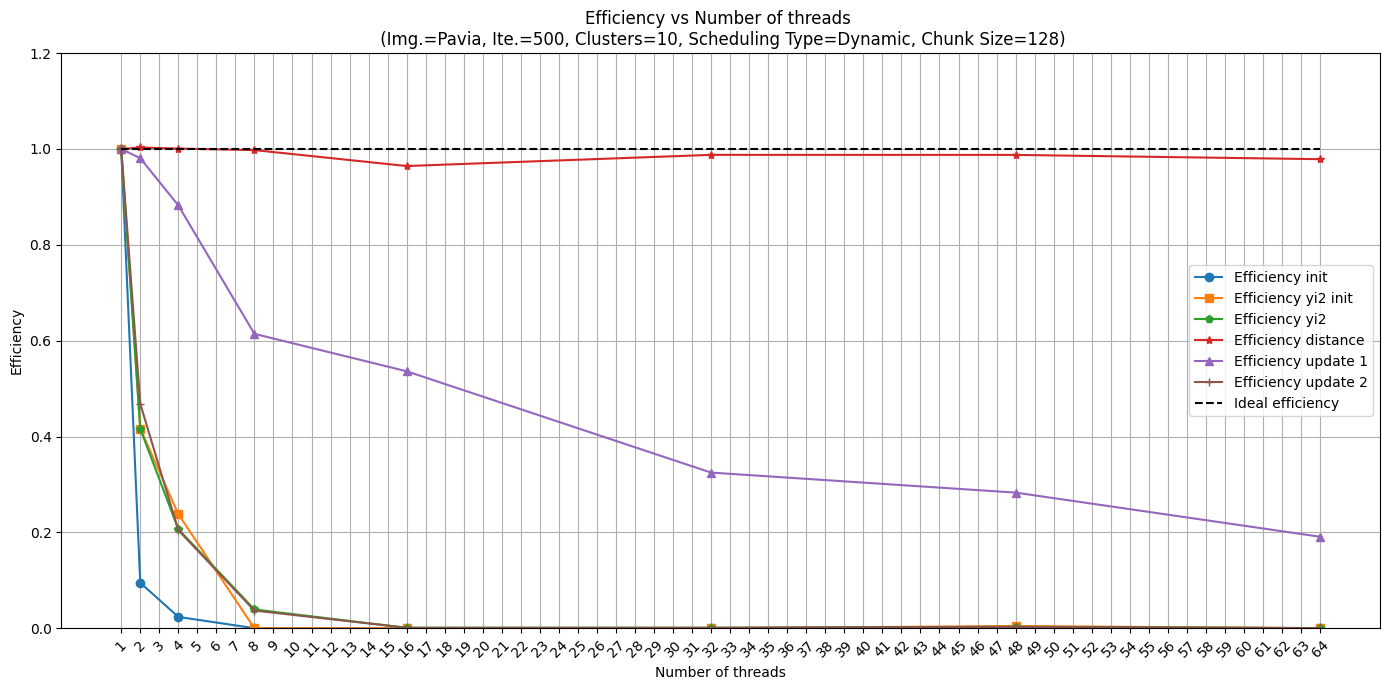

In [21]:
fixed_image = 'Pavia'
fixed_scheduling_type = 1
fixed_chunk_size = 128

filtered_df = summary_df[(summary_df['Scheduling type'] == fixed_scheduling_type) & (summary_df['Chunk size'] == fixed_chunk_size) & (summary_df['Image'] == fixed_image)]

filtered_df = filtered_df.sort_values('Number of threads')
max_threads = filtered_df['Number of threads'].max()

plt.figure(figsize=(14, 7))

plt.plot(filtered_df['Number of threads'], filtered_df['Efficiency init'], marker='o', label='Efficiency init')
plt.plot(filtered_df['Number of threads'], filtered_df['Efficiency yi2 init'], marker='s', label='Efficiency yi2 init')
plt.plot(filtered_df['Number of threads'], filtered_df['Efficiency yi2'], marker='p', label='Efficiency yi2')
plt.plot(filtered_df['Number of threads'], filtered_df['Efficiency distance'], marker='*', label='Efficiency distance')
plt.plot(filtered_df['Number of threads'], filtered_df['Efficiency update 1'], marker='^', label='Efficiency update 1')
plt.plot(filtered_df['Number of threads'], filtered_df['Efficiency update 2'], marker='+', label='Efficiency update 2')
plt.plot([1, max_threads], [1, 1], 'k--', label='Ideal efficiency')

plt.title(f'Efficiency vs Number of threads \n (Img.={fixed_image}, Ite.=500, Clusters=10, Scheduling Type={scheduling_types[fixed_scheduling_type]}, Chunk Size={fixed_chunk_size})')
plt.xlabel('Number of threads')
plt.ylabel('Efficiency')

plt.xticks(range(1, max_threads + 1), rotation=45)
plt.yticks()
plt.ylim(0, 1.2)

plt.grid()

plt.legend()

plt.tight_layout()

plt.savefig(os.path.join(images_dir, f'efficiency_vs_threads.{fixed_image.lower()}.png'))
plt.savefig(os.path.join(images_dir, f'efficiency_vs_threads.{fixed_image.lower()}.pdf'))

plt.show()
